In [1]:
cd ../

/Users/arbaaz/Downloads/mabe/mabe_code


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
from data_utils import (
    get_index, 
    get_file_names,
    get_paths,
    get_col_names, 
    sleep
)


path = "/Users/arbaaz/Downloads/mabe/ds"
get_file_names(path)

['.DS_Store',
 'sample_submission.csv',
 'test.csv',
 'test_tracking',
 'train.csv',
 'train_annotation',
 'train_tracking']

In [4]:
get_file_names(path+"/train_annotation")

['AdaptableSnail',
 'BoisterousParrot',
 'CRIM13',
 'CalMS21_supplemental',
 'CalMS21_task1',
 'CalMS21_task2',
 'CautiousGiraffe',
 'DeliriousFly',
 'ElegantMink',
 'GroovyShrew',
 'InvincibleJellyfish',
 'JovialSwallow',
 'LyricalHare',
 'NiftyGoldfinch',
 'PleasantMeerkat',
 'ReflectiveManatee',
 'SparklingTapir',
 'TranquilPanther',
 'UppityFerret']

In [5]:
import pandas as pd


train_metadata = pd.read_csv("/Users/arbaaz/Downloads/mabe/ds/train.csv")
train_metadata.head()

,lab_id,video_id,mouse1_strain,mouse1_color,mouse1_sex,mouse1_id,mouse1_age,mouse1_condition,mouse2_strain,mouse2_color,...,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,arena_shape,arena_type,body_parts_tracked,behaviors_labeled,tracking_method
0,AdaptableSnail,44566106,CD-1 (ICR),white,male,10.0,8-12 weeks,wireless device,CD-1 (ICR),white,...,16.0,1228,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
1,AdaptableSnail,143861384,CD-1 (ICR),white,male,3.0,8-12 weeks,NaN,CD-1 (ICR),white,...,9.7,968,608,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
2,AdaptableSnail,209576908,CD-1 (ICR),white,male,7.0,8-12 weeks,NaN,CD-1 (ICR),white,...,16.0,1266,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
3,AdaptableSnail,278643799,CD-1 (ICR),white,male,11.0,8-12 weeks,wireless device,CD-1 (ICR),white,...,16.0,1224,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
4,AdaptableSnail,351967631,CD-1 (ICR),white,male,14.0,8-12 weeks,NaN,CD-1 (ICR),white,...,16.0,1204,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut


In [205]:
train_meta = train_metadata.query("~lab_id.isin(@not_in_test)")
len(train_meta)

368

In [ ]:
# Checking if all ids of mouses are exlusive or not by lab

id_cols = get_col_names("_id")

for id, grp in train_meta.groupby("lab_id"):
    all_ids_lsts = []
    
    for col in id_cols:
        id_lst = grp[col].unique().tolist()
        all_ids_lsts.append(id_lst)

    all_ids = [x for lst in all_ids_lsts for x in lst]
    
    if not len(set(all_ids)) == len(all_ids):
        print(f"Error in {id}")                          # this maybe incorrect 

Error in GroovyShrew


In [144]:
shrew = train_meta.groupby("lab_id").get_group("GroovyShrew")

all_ids_lsts = []

for col in id_cols:
    id_lst = shrew[col].unique().tolist()
    all_ids_lsts.append(id_lst)

all_ids_lsts

[[13.0, 18.0, 4.0, 15.0, 9.0, 19.0, 7.0],
 [16.0, 14.0, 8.0, 3.0, 6.0, 2.0, 1.0, 12.0, 4.0, 5.0],
 [nan],
 [nan]]

In [157]:
pretrain_labs = [
    "MABe22_keypoints",
    "MABe22_movies",
]

In [158]:
pretrain_meta = train_metadata.query("lab_id.isin(@pretrain_labs)")
pretrain_meta["lab_id"].unique()

array(['MABe22_keypoints', 'MABe22_movies'], dtype=object)

In [ ]:
# Checking if all ids of mouses are exlusive or not by lab

id_cols = get_col_names("_id")

for id, grp in pretrain_meta.groupby("lab_id"):
    all_ids_lsts = []
    
    for col in id_cols:
        id_lst = grp[col].unique().tolist()
        all_ids_lsts.append(id_lst)

    all_ids = [x for lst in all_ids_lsts for x in lst]
    
    if not len(set(all_ids)) == len(all_ids):
        print(f"Error in {id}")

In [164]:
calcrim = [
    "CalMS21_supplemental",
    "CalMS21_task1",
    "CalMS21_task2",
    "CRIM13"
]

In [203]:
calcrim_meta = train_metadata.query("lab_id.isin(@calcrim)")
calcrim_meta["lab_id"].unique()

array(['CRIM13', 'CalMS21_supplemental', 'CalMS21_task1', 'CalMS21_task2'],
      dtype=object)

In [ ]:
# Checking if all ids of mouses are exlusive or not by lab

id_cols = get_col_names("_id")

for id, grp in calcrim_meta.groupby("lab_id"):
    all_ids_lsts = []
    
    for col in id_cols:
        id_lst = grp[col].unique().tolist()
        all_ids_lsts.append(id_lst)

    all_ids = [x for lst in all_ids_lsts for x in lst]
    
    if not len(set(all_ids)) == len(all_ids):
        print(f"Error in {id}")

In [223]:
from collections import defaultdict


all_ids_dict = defaultdict(set)

# check global ids of all mouses unique or not

for lab_id, grp in train_metadata.groupby("lab_id"):
    for col in id_cols:
        all_ids_dict[col].update(grp[col].unique())
        
all_ids = [x for v in all_ids_dict.values() for x in v]

len(set(all_ids)) == len(all_ids)

False

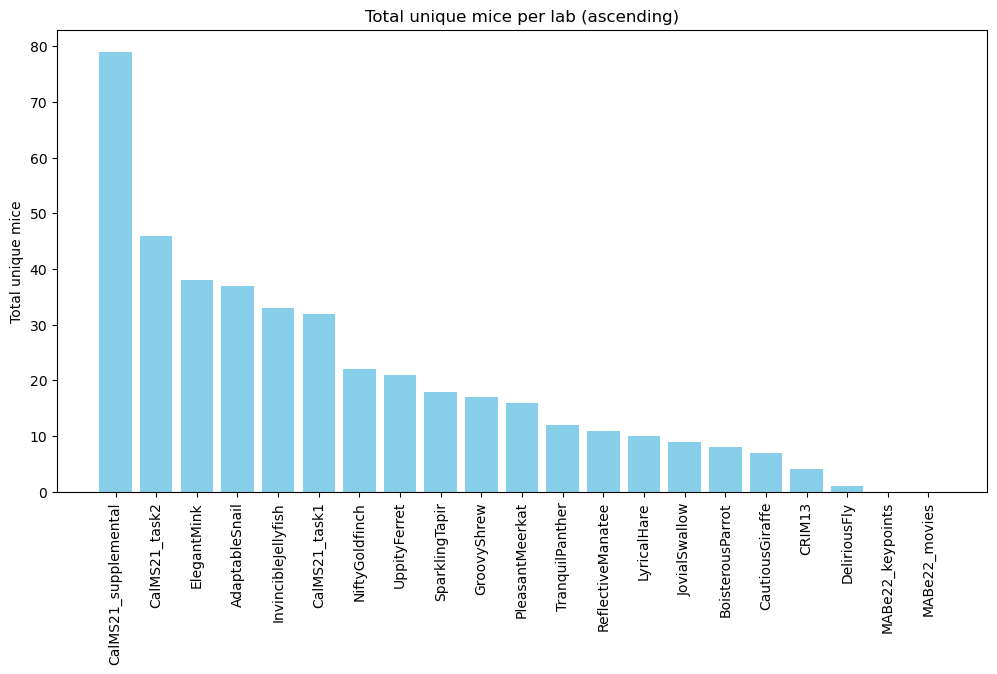

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Get all columns containing "_id"
id_cols = get_col_names("_id")

# Compute total unique mice per lab
lab_totals = train_metadata.groupby("lab_id")[id_cols].nunique().sum(axis=1)

# Convert to DataFrame for plotting
df_plot = lab_totals.reset_index()
df_plot.columns = ['lab_id', 'total_mice']

# Sort by total_mice ascending
df_plot = df_plot.sort_values('total_mice', ascending=False)

# Bar plot
plt.figure(figsize=(12,6))
plt.bar(df_plot['lab_id'], df_plot['total_mice'], color='skyblue')
plt.xticks(rotation=90)
plt.ylabel("Total unique mice")
plt.title("Total unique mice per lab (ascending)")
plt.show()


In [19]:
from data_utils import pretrain_labs


x = train_metadata.groupby("lab_id").get_group(pretrain_labs[0])

for l in pretrain_labs:
    x = train_metadata.groupby("lab_id").get_group(l)

    for col in id_cols:
        print(x[col].unique())

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]


In [21]:
train_metadata.groupby("lab_id")[id_cols].nunique()

,mouse1_id,mouse2_id,mouse3_id,mouse4_id
lab_id,,,,
AdaptableSnail,10,10,10,7
BoisterousParrot,4,4,0,0
CRIM13,4,0,0,0
CalMS21_supplemental,79,0,0,0
CalMS21_task1,32,0,0,0
CalMS21_task2,46,0,0,0
CautiousGiraffe,7,0,0,0
DeliriousFly,1,0,0,0
ElegantMink,19,19,0,0


In [27]:
train_metadata.groupby("lab_id").size().sort_values(ascending=True)

lab_id
DeliriousFly               6
BoisterousParrot           8
CautiousGiraffe           10
NiftyGoldfinch            11
AdaptableSnail            17
GroovyShrew               17
ElegantMink               19
ReflectiveManatee         20
UppityFerret              21
CRIM13                    21
LyricalHare               24
TranquilPanther           25
InvincibleJellyfish       33
PleasantMeerkat           36
JovialSwallow             52
SparklingTapir            69
CalMS21_task2             76
CalMS21_task1            101
CalMS21_supplemental     297
MABe22_movies           2606
MABe22_keypoints        5320
dtype: int64

In [32]:
train_metadata["video_id"].unique()

array([  44566106,  143861384,  209576908, ..., 1960237444, 2045808129,
       2104375029], shape=(8789,))

In [40]:
count = 0

# checking if ids are not unique in any row

for idx, row in train_metadata.iterrows():
    ids = []
    
    for col in id_cols:
        ids.append(row[col])   
    
    if len(ids) != len(set(ids)):
        count += 1        
count

0

In [18]:
# check inter id col uniquess by each row because each row represents a single video of a lab 
# this should be unique if not an error 

count = 0
id_cols = get_col_names("_id")

for idx, row in train_metadata.iterrows():
    ids = set()
    
    for col in id_cols:
        ids.add(row[col])
    
    if not len(ids) == 4:
        count += 1
        
count

0

In [49]:
from collections import defaultdict

# names and number of labs that contains all four ids upto only single id

id_info_dict = defaultdict(lambda: defaultdict(int))

for lab_id, grp in train_metadata.groupby("lab_id"):
    for _, row in grp.iterrows():

        count = sum(not pd.isna(row[col]) for col in id_cols)
            
        if count == 4:
            id_info_dict[lab_id]["all_four"] += 1
        elif count == 3:
            id_info_dict[lab_id]["triple"] += 1
        elif count == 2:
            id_info_dict[lab_id]["double"] += 1
        elif count == 1:
            id_info_dict[lab_id]["single"] += 1
        elif count == 0:
            id_info_dict[lab_id]["none"] += 1
            
df = pd.DataFrame.from_dict(
    {k: dict(v) for k, v in id_info_dict.items()}, 
    orient='index'
).fillna(0).astype(int)

print(df)

                      all_four  triple  double  single  none
AdaptableSnail              10       7       0       0     0
BoisterousParrot             0       0       8       0     0
ElegantMink                  0       0      19       0     0
GroovyShrew                  0       0      17       0     0
NiftyGoldfinch               0       0      11       0     0
PleasantMeerkat              0       0      36       0     0
CRIM13                       0       0       0      21     0
CalMS21_supplemental         0       0       0     297     0
CalMS21_task1                0       0       0     101     0
CalMS21_task2                0       0       0      76     0
CautiousGiraffe              0       0       0      10     0
DeliriousFly                 0       0       0       6     0
InvincibleJellyfish          0       0       0      33     0
JovialSwallow                0       0       0      52     0
LyricalHare                  0       0       0      24     0
ReflectiveManatee       

In [64]:
from statistics import mean


# unique id count by lab id cols exclusive

unique_ids_by_lab = defaultdict(set)

for lab_id, grp in train_metadata.groupby("lab_id"):
    for col in id_cols:
        unique_ids_by_lab[lab_id].update(grp[col].dropna().unique())
        

unique_id_count_dict = {k: {'unique_id_count': len(v)} for k, v in unique_ids_by_lab.items()}

# Create DataFrame
df = pd.DataFrame.from_dict(unique_id_count_dict, orient='index')

print(df)

unique_counts = [len(v) for v in unique_ids_by_lab.values()]

# Compute average
avg_unique_ids = mean(unique_counts)

print(f"Average unique IDs per lab: {avg_unique_ids:.2f}")


                      unique_id_count
AdaptableSnail                     37
BoisterousParrot                    8
CRIM13                              4
CalMS21_supplemental               79
CalMS21_task1                      32
CalMS21_task2                      46
CautiousGiraffe                     7
DeliriousFly                        1
ElegantMink                        38
GroovyShrew                        16
InvincibleJellyfish                33
JovialSwallow                       9
LyricalHare                        10
MABe22_keypoints                    0
MABe22_movies                       0
NiftyGoldfinch                     22
PleasantMeerkat                    16
ReflectiveManatee                  11
SparklingTapir                     18
TranquilPanther                    12
UppityFerret                       21
Average unique IDs per lab: 20.00
